## Inspection code for TFTH models
(run this from the notebooks folder)

In [1]:
import teafacto as tea, re, pandas as pd, seaborn as sns
from teafacto.scripts import tfth
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
m = tfth.loadmodel("../models/tfth.2015-11-26=17:22")
fd, rd = tfth.loaddicts("../data/nycfilms/fulltensor.apx.pkl")

In [3]:
dbr = "http://dbpedia.org/resource/"
fd.keys()[:50]
rd.keys()[:50]
fd["http://dbpedia.org/ontology/foundedBy"]

11707

In [4]:
gk = "http://dbpedia.org/resource/Grace_Kelly"
sp = "http://dbpedia.org/ontology/spouse"
bp = "http://dbpedia.org/ontology/birthPlace"
lo = "http://dbpedia.org/ontology/location"

In [5]:
gk = fd[gk]
spi = fd["-"+sp]
sp = fd[sp]
bpi = fd["-"+bp]
bp = fd[bp]
loi = fd["-"+lo]
lo = fd[lo]

In [6]:
print m.normXY(gk)
print m.normXY(sp)
print m.embedXYcos(gk, sp)
print m.embedXYcos(gk, spi)
print m.embedXYcos(gk, bp)
print m.embedXYcos(gk, bpi)
print m.embedXYcos(gk, lo)
print m.embedXYcos(gk, loi)

1.15354767977
1.47335775459
0.601671165231
0.625393831115
0.665025549994
-0.60051681217
-0.331188371402
-0.607282826783


### Direct compatibility between entities and relations

In [7]:
prefixes = {"dbo": "http://dbpedia.org/ontology/",
            "dbr": "http://dbpedia.org/resource/"}
ents = ["dbr:Grace_Kelly",  
        "dbr:Alfred_Hitchcock",
        "dbr:Emma_Stone",
        "dbr:Hans_Zimmer",
        "dbr:Rear_Window",
        "dbr:Avengers:_Age_of_Ultron", 
        "dbr:New_York_City",
        "dbr:Lviv", 
        "dbr:United_States",
        "dbr:Sony_Pictures_Entertainment",
        "dbr:Warner_Bros.",
        "dbr:Paramount_Pictures"]
rels = ["dbo:spouse", "-dbo:spouse",
        "dbo:birthPlace", "-dbo:birthPlace",
        "dbo:location", "-dbo:location",
        "dbo:foundedBy","-dbo:foundedBy",
        "dbo:director", "-dbo:director",
        "dbo:producer", "-dbo:producer",
        "dbo:starring", "-dbo:starring",
        "dbo:country", "-dbo:country",
        "dbo:musicComposer", "-dbo:musicComposer"]

In [8]:
prefixre = "(\-?)(\w+):(.*)"
prefixre = re.compile(prefixre)

In [9]:
def dopre(es, prefixes):
    m = prefixre.match(es)
    return m.group(1) + prefixes[m.group(2)] + m.group(3)

def computemetric(e, r, f, fd, prefixes):
    eid = fd[dopre(e, prefixes)]
    rid = fd[dopre(r, prefixes)]
    return f(eid, rid)

In [10]:
todf = []
for ent in ents:
    row = []
    for rel in rels:
        row.append(computemetric(ent, rel, m.embedXYdot, fd, prefixes))
    todf.append(row)

In [11]:
df = pd.DataFrame(todf)
df.columns = map(lambda x: prefixre.match(x).group(1)+prefixre.match(x).group(3), rels)
df.index = map(lambda x: prefixre.match(x).group(1)+prefixre.match(x).group(3), ents)

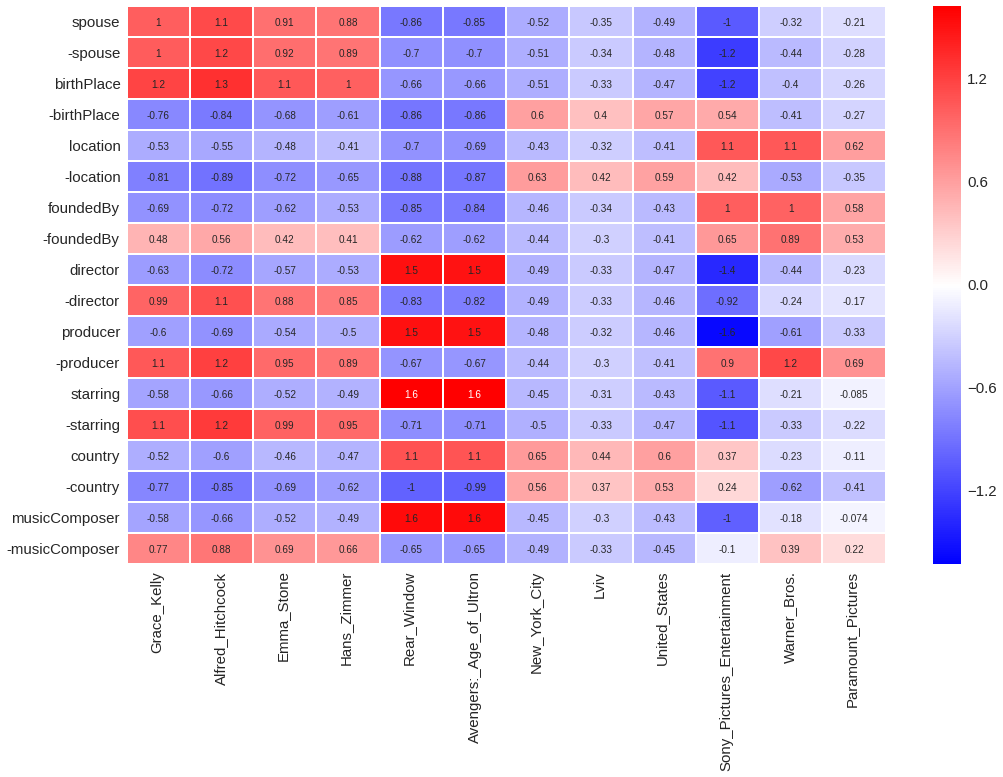

In [12]:
sns.set_context("notebook", font_scale=1.5)
f, ax = plt.subplots(figsize=(17,10))
sns.heatmap(df.T, annot=True, linewidths=1.0, ax=ax, cmap="bwr")

### Trans-compatibility

In [13]:
trels = [
    "dbo:spouse",
    "dbo:birthPlace",
    "dbo:location",
    "dbo:foundedBy",
    "dbo:producer",
    "dbo:director",
    "dbo:starring",
    "dbo:musicComposer",
]

In [14]:
def computeZXYmetric(t, e, r, f, fd, rd, pre):
    tid = rd[dopre(t, prefixes)]
    eid = fd[dopre(e, prefixes)]
    rid = fd[dopre(r, prefixes)]
    return f(tid, eid, rid)

In [15]:
tdfs = {}
for trel in trels:
    totdf = []
    for ent in ents:
        row = []
        for rel in rels:
            row.append(computeZXYmetric(trel, ent, rel, m.embedXYZdot, fd, rd, prefixes))
        totdf.append(row)
    tdf = pd.DataFrame(totdf)
    tdf.columns = map(lambda x: prefixre.match(x).group(1)+prefixre.match(x).group(3), rels)
    tdf.index = map(lambda x: prefixre.match(x).group(1)+prefixre.match(x).group(3), ents)
    tdfs[trel] = tdf


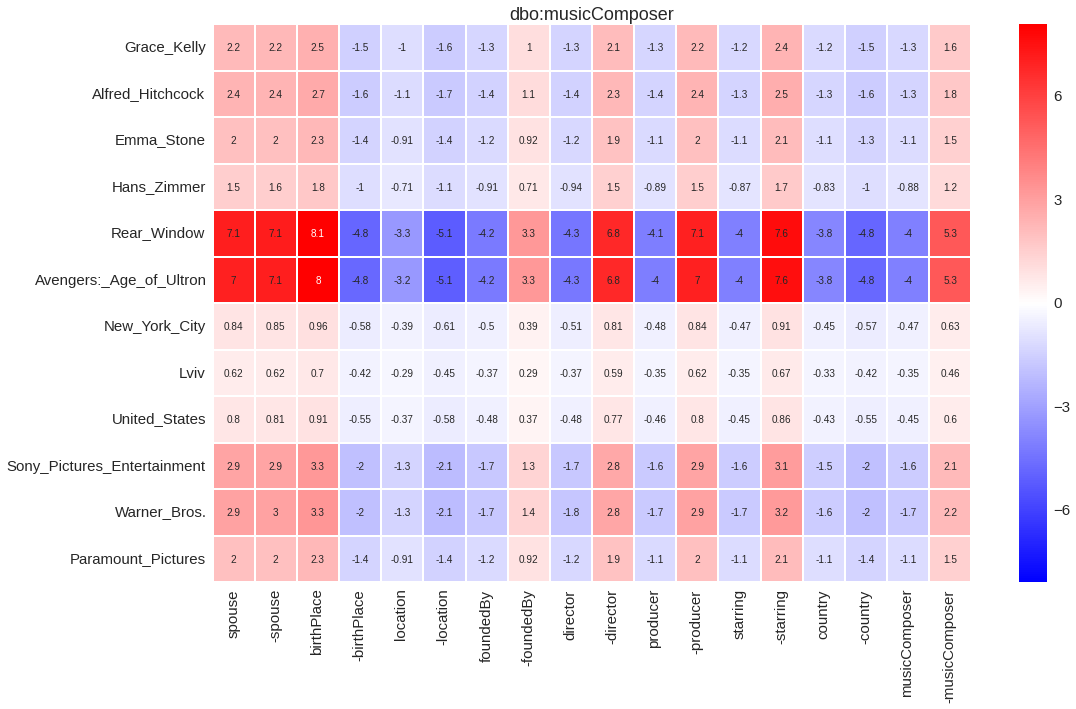

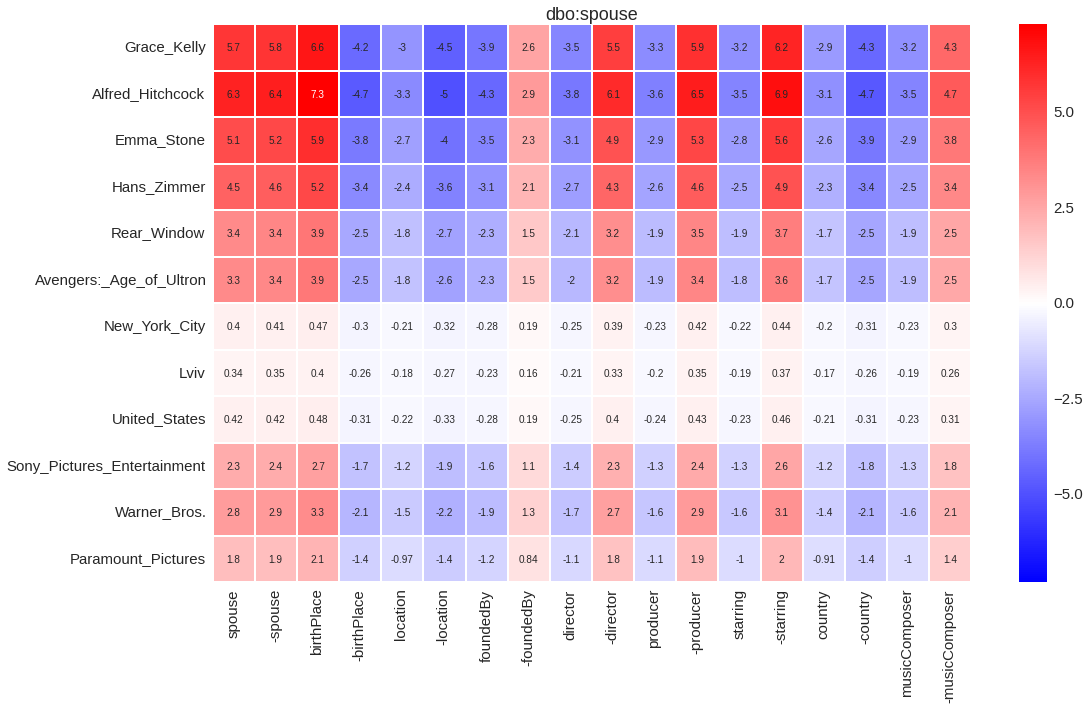

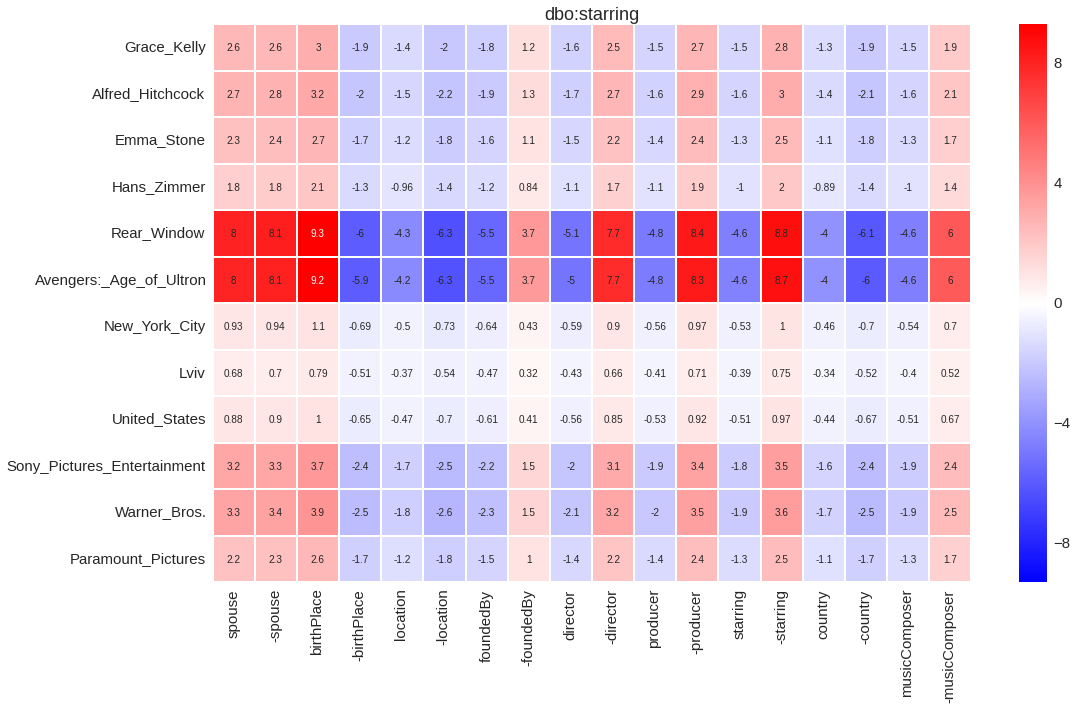

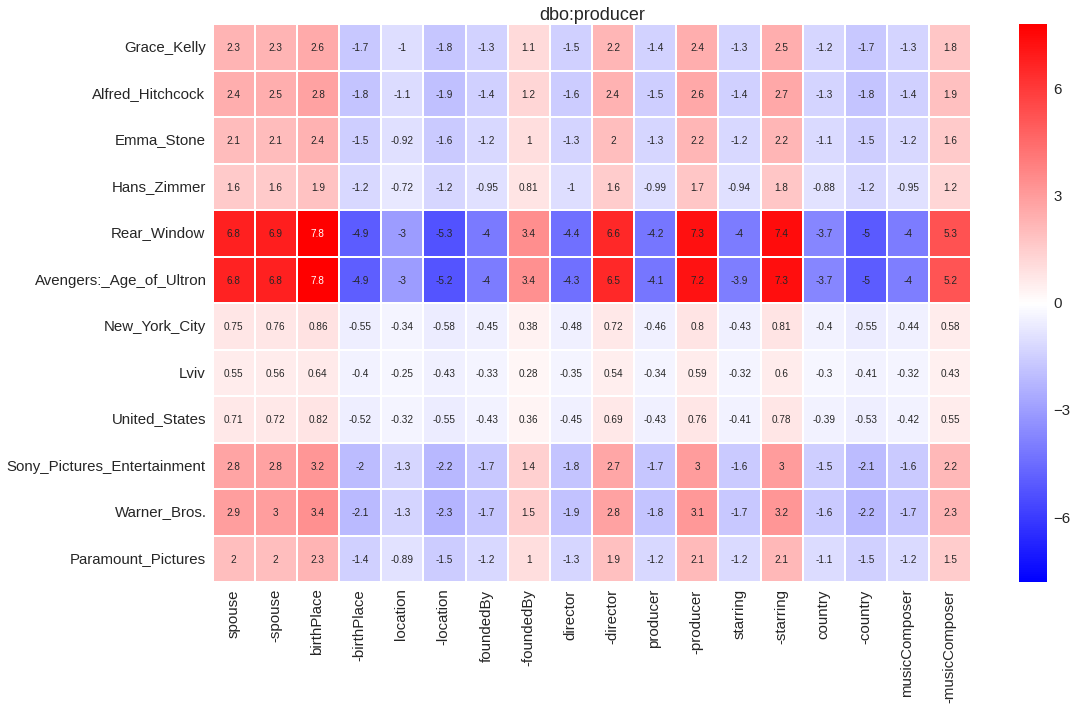

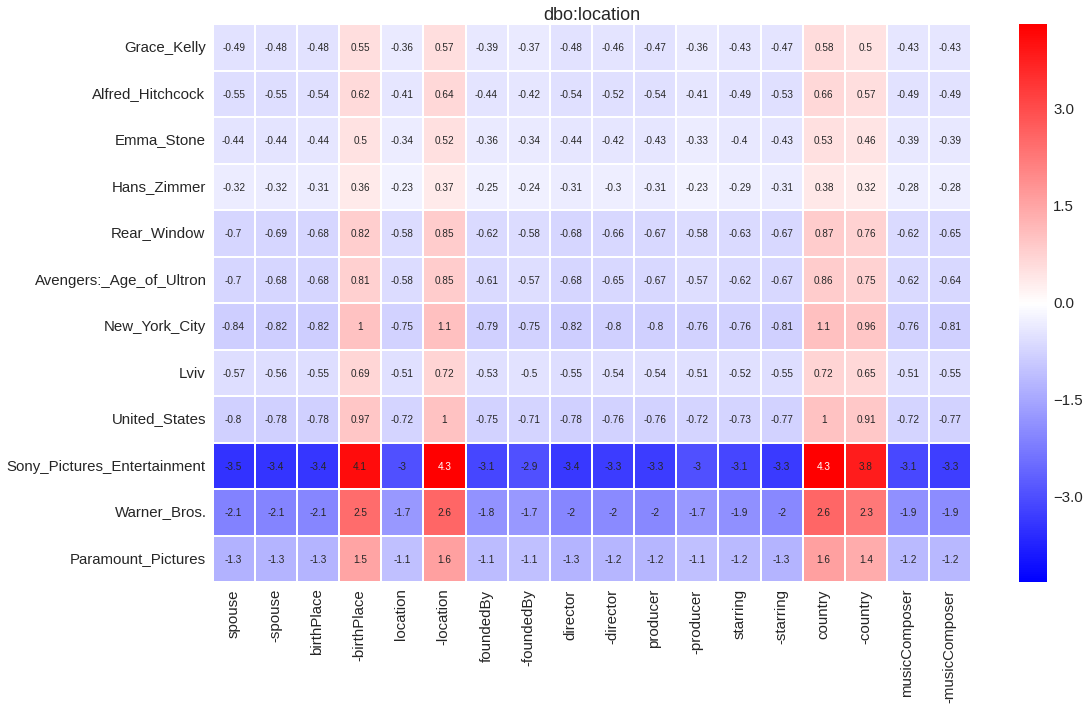

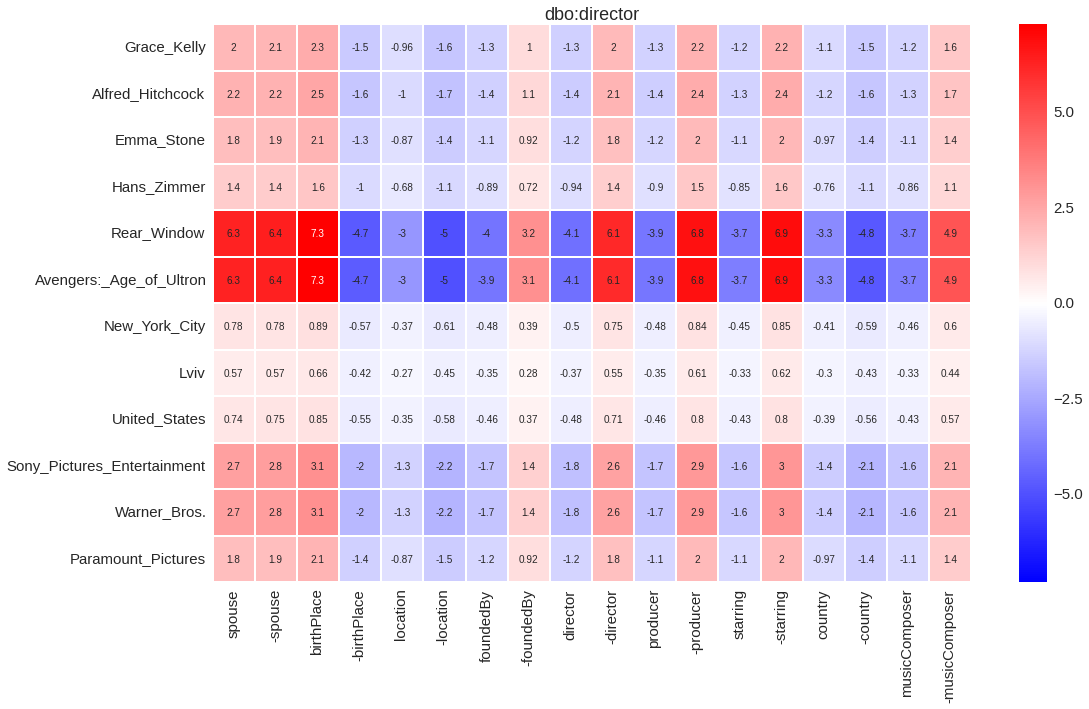

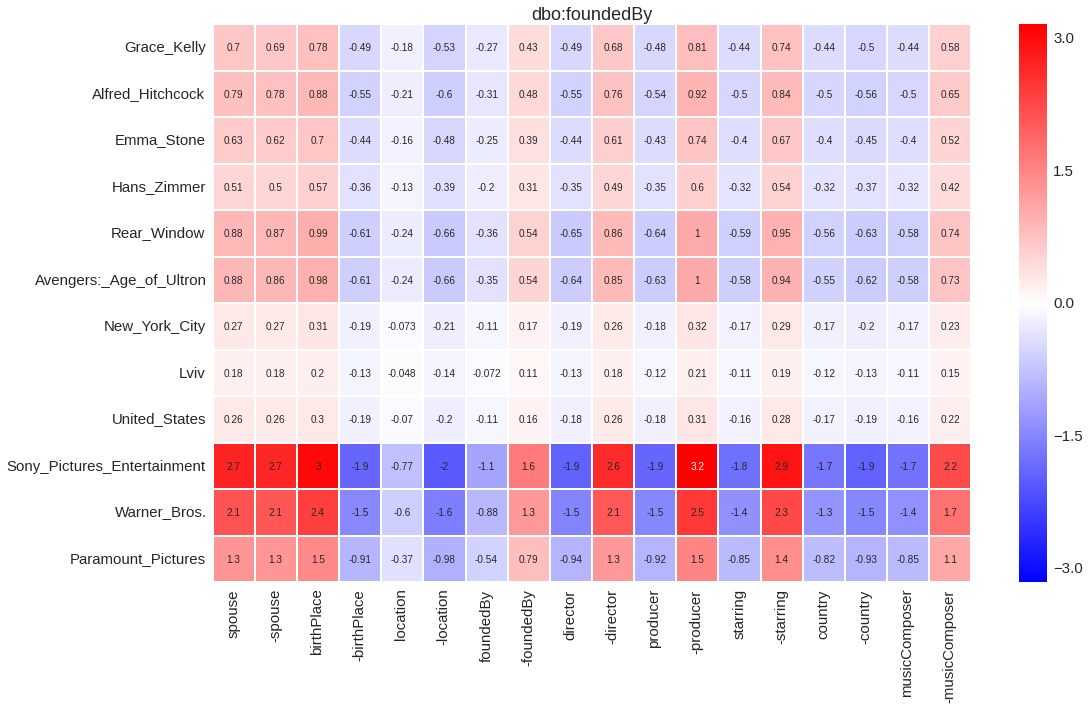

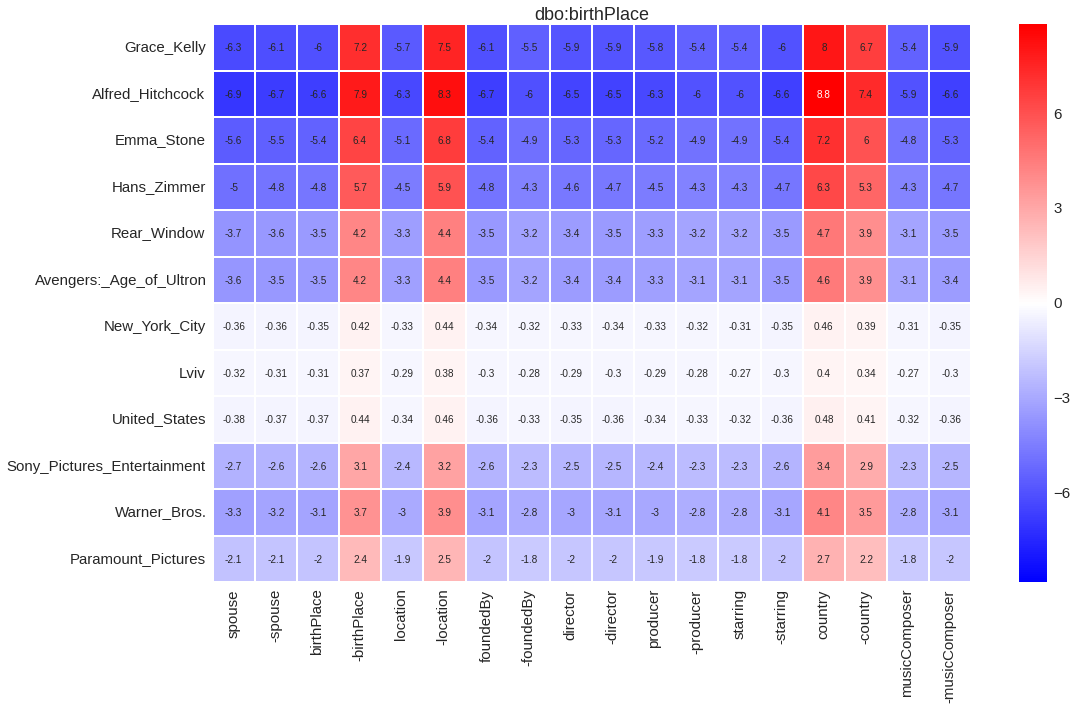

In [16]:
for tdf in tdfs:
    f, ax = plt.subplots(figsize=(17,10))
    ax.set_title(tdf)
    hm = sns.heatmap(tdfs[tdf], annot=True, linewidths=1.0, ax=ax, cmap="bwr")

### Chains compat (trans-trans-compat): TODO

### Relation-relation compat